In [17]:
##NOTE : https://www.hackerearth.com/practice/machine-learning/machine-learning-projects/python-project/tutorial/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (10.0, 8.0)

### 1. Data Loading

In [53]:
#Loading Dataset
train = pd.read_csv('HousingPrices_Train.csv')
test = pd.read_csv('HousingPrices_Test.csv')

### 2. Data Exploration

In [54]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
#Checking rows and columns in training and testing dataset
print('Training data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('Test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

Training data has 1460 rows and 81 columns
Test data has 1459 rows and 80 columns


### Handling Null Values

In [56]:
#Check columns with missing values
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [57]:
#Finding count of missing values in each column
missing_count = train.isnull().sum()
missing_count = missing_count[missing_count > 0]
missing_count.sort_values(inplace=True)

In [58]:
missing_count

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

We can infer that columns PoolQC, MiscFeature, Alley and Fence have a lot of missing values. Now let's visualize this using a barplot for better understanding.

In [60]:
#Creeating Dataframe from missing_count series for feeding nto seaborn barplot 

miss_frame = pd.DataFrame(missing_count)
miss_frame.columns = ['Count']
miss_frame.index.names = ['Column']
miss_frame['Column'] = miss_frame.index

miss_frame

,Count,Column
Column,,
Electrical,1,Electrical
MasVnrType,8,MasVnrType
MasVnrArea,8,MasVnrArea
BsmtQual,37,BsmtQual
BsmtCond,37,BsmtCond
BsmtFinType1,37,BsmtFinType1
BsmtExposure,38,BsmtExposure
BsmtFinType2,38,BsmtFinType2
GarageCond,81,GarageCond


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

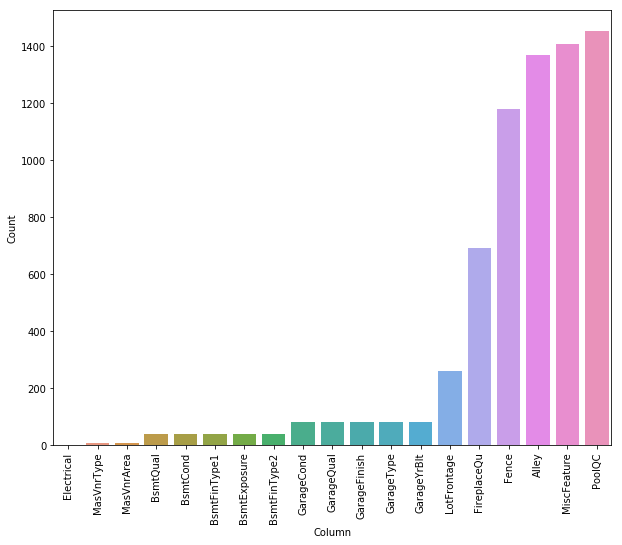

In [61]:
sns.barplot(x='Column', y='Count', data=miss_frame)

#Rotate xlabkes by 90 degress to aoid overlapping
plt.xticks(rotation = 90)

In [68]:
train['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [69]:
train['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

# TODO fill null values

#### Now let's check the distribution of the target variable 'SalePrice'. We'll also check for skewness, which is a measure of the shape of the distribution of values.

Skew is 1.8828757597682129


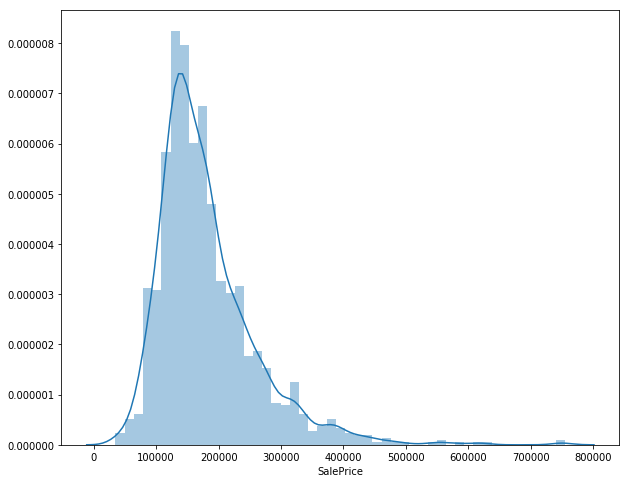

In [15]:
print('Skew is {}'.format(train['SalePrice'].skew()))
sns.distplot(train['SalePrice'])

#### Now let's use np.log() to transform train.SalePrice and re-calculate the skewness and re-plot the data. A value closer to 0 means that we have improved the skewness of the data.

Skew is: 0.12133506220520406


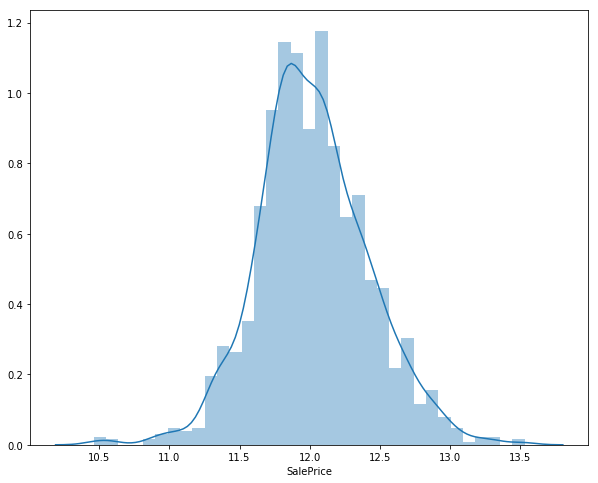

In [18]:
new_saleprice = np.log(train['SalePrice'])
print ("Skew is:", new_saleprice.skew())

sns.distplot(np.log(train['SalePrice']))

In [19]:
#Removing Id column from dataset
train.drop(['Id'], axis=1, inplace=True)

categorical_features = train.select_dtypes(include=['object'])
numeric_features = train.select_dtypes(exclude=['object'])

In [20]:
print('There are {} categorical and {} numeric features in the training dataset'
      .format(categorical_features.shape[1], numeric_features.shape[1]))

There are 43 categorical and 37 numeric features in the training dataset


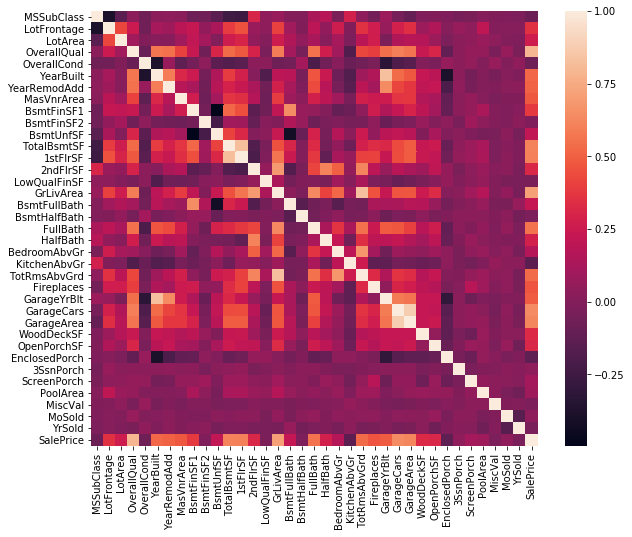

In [70]:
#correlation plot (only for numerical features)
corr = numeric_features.corr()
sns.heatmap(corr)

Observing the last row 'SalePrice' in above heatmap, we can conclude that few features have stronger correltion with dependent variable (SalePrice). These are marked by darker color in the heatmap.

In [29]:
#Viewing actual correlation in sorted manner
corr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

#### The first five features are the most positively correlated with SalePrice, while the last five are the most negatively correlated.

In [38]:
train['OverallQual'].unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

#### Observing OverallQual, we can see that it has repeated values. So we will group them and see its relation with SalePrice

In [32]:
#Grouping OverallQual values with the mean of SalePrice
x = train.groupby('OverallQual', axis=0).mean()['SalePrice']

print(x)

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64


Text(0, 0.5, 'Median Sale Price')

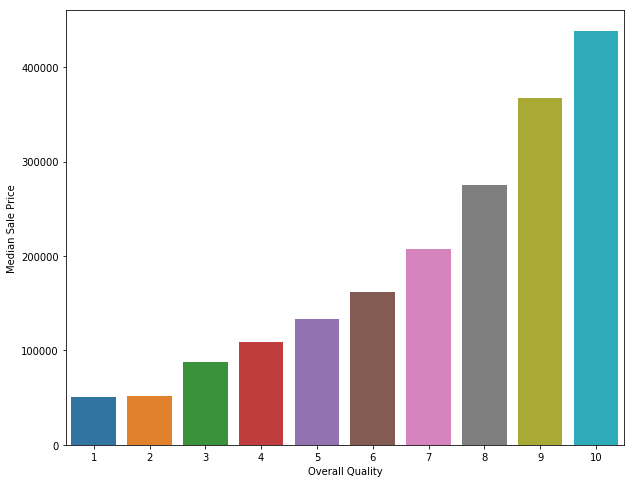

In [37]:
#Plotting overall quality in a bar plot
sns.barplot(x.index,x.values)
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')

#### Above plot clearly shows strong correleation between OverallQual and SalePrice.

#### Moving to next highest correlated features. We will use sns.scatterplot() to generate some scatter plots and visualize the relationship between the Ground Living Area GrLivArea and SalePrice.

Text(0.5, 0, 'Above grade (ground) living area square feet')

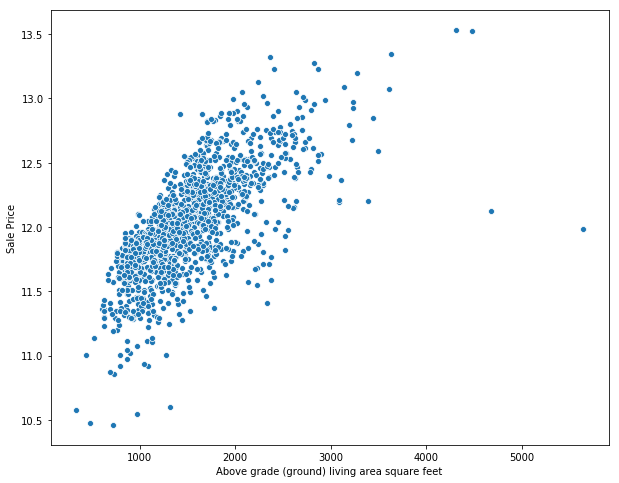

In [48]:
#Note that we used non-skewed SalePrice calculated earlier for plotting
sns.scatterplot(x=train['GrLivArea'], y=new_saleprice)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')

In [49]:
#Notice that there are few few outliers in our scatter plot. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we'll remove those observations from our data.

#Removing Outliers from above scatter plot:
train = train[train['GrLivArea'] < 4000]

Text(0.5, 0, 'Garage Area')

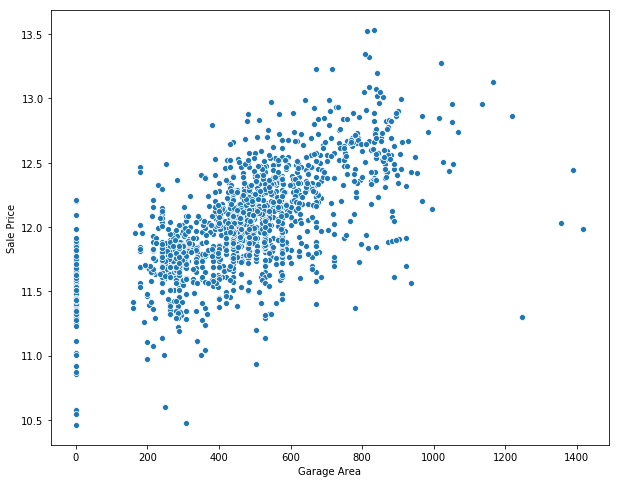

In [47]:
#Note that we used non-skewed SalePrice calculated earlier for plotting
sns.scatterplot(x=train['GarageArea'], y=new_saleprice)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')

In [50]:
#Removing Outliers from above scatter plot:
train = train[train['GarageArea'] < 1200]

#### Now let's replot it after removing outliers

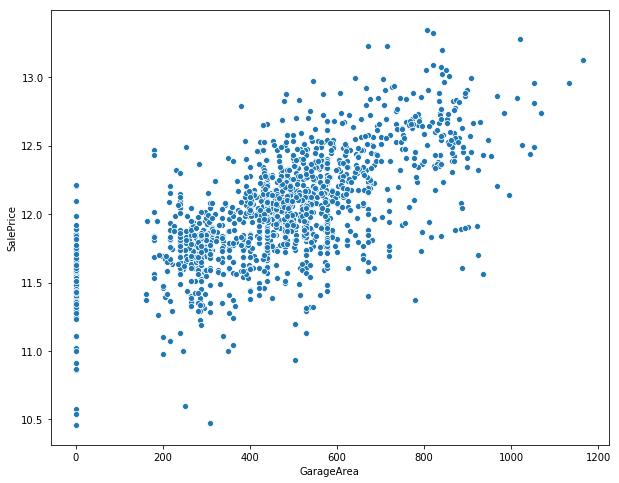

In [51]:
sns.scatterplot(x=train['GarageArea'], y=new_saleprice)


### Feature Engineering and Transforrmations

#### Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. 

#### Note that feature enginnering has to be applied to both training and test dataset.

In [74]:
numeric_features.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [75]:
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [84]:
#Checking value count of a random Categorical feature
train['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [92]:
#One-hot encoding to transform the data into a Boolean column 
train['enc_street'] = pd.get_dummies(train['Street'], drop_first=True)
test['enc_street'] = pd.get_dummies(test['Street'], drop_first=True)

In [90]:
#Verifying encoded feature
train['enc_street'].value_counts()

1    1454
0       6
Name: enc_street, dtype: int64

In [106]:
#next feature
train['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [96]:
#Grouping OverallQual values with the mean of SalePrice
x = train.groupby('SaleCondition', axis=0).mean()['SalePrice']

print(x)

SaleCondition
Abnorml    146526.623762
AdjLand    104125.000000
Alloca     167377.416667
Family     149600.000000
Normal     175202.219533
Partial    272291.752000
Name: SalePrice, dtype: float64


Text(0, 0.5, 'Median Sale Price')

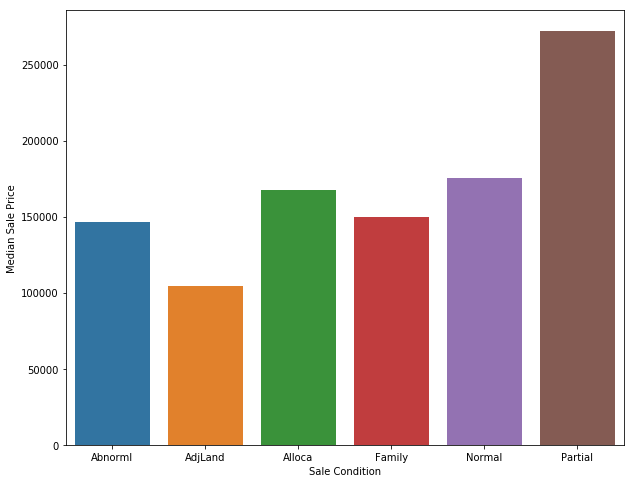

In [98]:
sns.barplot(x.index, x.values)
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')

#### Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

In [107]:
train['enc_salecondition'] = train['SaleCondition'].apply(lambda x : 1 if x =='Partial' else 0)
test['enc_salecondition'] = test['SaleCondition'].apply(lambda x : 1 if x =='Partial' else 0)

In [108]:
#Now let's plot out new feature 'enc_salecondition' against meanof SalePrice
x = train.groupby('enc_salecondition', axis=0).mean()['SalePrice']

print(x)

enc_salecondition
0    172365.900375
1    272291.752000
Name: SalePrice, dtype: float64


Text(0, 0.5, 'Median Sale Price')

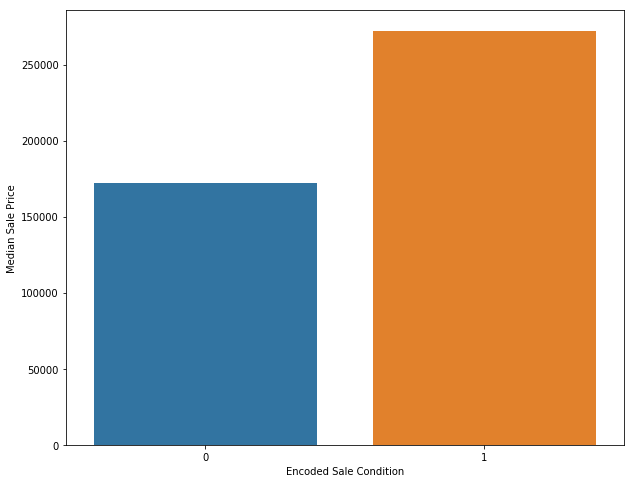

In [109]:
sns.barplot(x.index, x.values)
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')